# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

## Exploratory data analysis

In [58]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


#Importing both files and merging them as a singular dataframe (DF)
dfx = pd.read_excel("season2020-2021SpainBIS.xlsx")
# dfy = pd.read_excel("season2021-2022Spain.xlsx")
# frames = [dfx, dfy]
# df = pd.concat(frames)
df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         12379 non-null  object 
 1   #              11619 non-null  float64
 2   Nation         11619 non-null  object 
 3   Pos            11619 non-null  object 
 4   Age            11619 non-null  object 
 5   Min            12367 non-null  float64
 6   Gls            12379 non-null  int64  
 7   Ast            12379 non-null  int64  
 8   PK             12379 non-null  int64  
 9   PKatt          12379 non-null  int64  
 10  Sh             12379 non-null  int64  
 11  SoT            12379 non-null  int64  
 12  CrdY           12379 non-null  int64  
 13  CrdR           12379 non-null  int64  
 14  Touches        12367 non-null  float64
 15  Press          12367 non-null  float64
 16  Tkl            12367 non-null  float64
 17  Int            12379 non-null  int64  
 18  Blocks

In [59]:
#Visualizing the DF head (20 first elements)
df.head(20)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
5,Kenedy,24.0,br BRA,"RW,LW",25-073,20.0,1,1,0,0,...,4.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
6,Ángel Montoro,19.0,es ESP,CM,32-301,70.0,0,0,0,0,...,23.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
7,Víctor Díaz,16.0,es ESP,"CB,CM",32-314,20.0,0,0,0,0,...,1.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
8,Yangel Herrera,21.0,ve VEN,CM,23-105,90.0,0,0,0,0,...,13.0,2.0,0.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
9,Antonio Puertas,10.0,es ESP,"RM,RW,FW,LW",29-060,90.0,1,1,0,0,...,21.0,0.0,4.0,5.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"


In [60]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(20)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
5,Kenedy,24.0,br BRA,"RW,LW",25-073,20.0,1,1,0,0,...,4.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
6,Ángel Montoro,19.0,es ESP,CM,32-301,70.0,0,0,0,0,...,23.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
7,Víctor Díaz,16.0,es ESP,"CB,CM",32-314,20.0,0,0,0,0,...,1.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
8,Yangel Herrera,21.0,ve VEN,CM,23-105,90.0,0,0,0,0,...,13.0,2.0,0.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
9,Antonio Puertas,10.0,es ESP,"RM,RW,FW,LW",29-060,90.0,1,1,0,0,...,21.0,0.0,4.0,5.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"


In [61]:
#Visualizing the DF's feature informtion to spot nulls/NA's
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 0 to 12377
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         11498 non-null  object 
 1   #              11498 non-null  float64
 2   Nation         11498 non-null  object 
 3   Pos            11498 non-null  object 
 4   Age            11498 non-null  object 
 5   Min            11498 non-null  float64
 6   Gls            11498 non-null  int64  
 7   Ast            11498 non-null  int64  
 8   PK             11498 non-null  int64  
 9   PKatt          11498 non-null  int64  
 10  Sh             11498 non-null  int64  
 11  SoT            11498 non-null  int64  
 12  CrdY           11498 non-null  int64  
 13  CrdR           11498 non-null  int64  
 14  Touches        11498 non-null  float64
 15  Press          11498 non-null  float64
 16  Tkl            11498 non-null  float64
 17  Int            11498 non-null  int64  
 18  Blocks

In [62]:
#Regrouping the DF to spot the teams confronting each other
df_versus = df.groupby(["Match","Date","Team","Stadium","Crowd"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()

df_versus

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,"<span style=""display:inline-block"">Alejandro H...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,Villarreal,"Estadio de la Cerámica, Villarreal","4,800",4,2,0,0,12,5,0,0,524.0,120.0,15.0,6,16.0
756,Villarreal_vs_Valencia,2020-10-18,Valencia,"<span style=""display:inline-block"">Carlos del ...","Estadio de la Cerámica, Villarreal",1,1,0,0,11,3,1,0,497.0,91.0,14.0,4,23.0
757,Villarreal_vs_Valencia,2020-10-18,Villarreal,"<span style=""display:inline-block"">Carlos del ...","Estadio de la Cerámica, Villarreal",2,0,1,1,15,5,4,1,719.0,94.0,10.0,3,17.0
758,Villarreal_vs_Valladolid,2020-11-02,Valladolid,"<span style=""display:inline-block"">Alberola Ro...","Estadio de la Cerámica, Villarreal",0,0,0,0,11,1,3,0,497.0,121.0,22.0,4,14.0


In [63]:
#Generating the Label column (Results)

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals - Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)

df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
df_versus.head(25)

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0,0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0,1
4,Alavés_vs_Barcelona,2020-10-31,Alavés,"<span style=""display:inline-block"">Alejandro H...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0,2
5,Alavés_vs_Barcelona,2020-10-31,Barcelona,"<span style=""display:inline-block"">Alejandro H...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,0,0,25,8,3,0,989.0,85.0,19.0,4,7.0,2
6,Alavés_vs_Celta_Vigo,2021-04-04,Alavés,"<span style=""display:inline-block"">Antonio Mat...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,0,0,17,8,4,0,533.0,131.0,14.0,17,3.0,0
7,Alavés_vs_Celta_Vigo,2021-04-04,Celta Vigo,"<span style=""display:inline-block"">Antonio Mat...","Estadio de Mendizorroza, Vitoria-Gasteiz",3,3,0,0,8,6,5,1,459.0,190.0,22.0,5,16.0,1
8,Alavés_vs_Cádiz,2021-03-13,Alavés,"<span style=""display:inline-block"">Isidro Díaz...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,1,1,8,1,3,1,504.0,188.0,6.0,6,9.0,2
9,Alavés_vs_Cádiz,2021-03-13,Cádiz,"<span style=""display:inline-block"">Isidro Díaz...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,1,1,8,0,3,0,485.0,98.0,11.0,12,9.0,2


In [64]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a=1 # 1 is Home
    else:
        a=0 # 0 is Away
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus

,Match,Date,Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0,1,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0,0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0,0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0,1,0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,"<span style=""display:inline-block"">Alejandro H...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,Villarreal,"Estadio de la Cerámica, Villarreal","4,800",4,2,0,0,12,5,0,0,524.0,120.0,15.0,6,16.0,1,1
756,Villarreal_vs_Valencia,2020-10-18,Valencia,"<span style=""display:inline-block"">Carlos del ...","Estadio de la Cerámica, Villarreal",1,1,0,0,11,3,1,0,497.0,91.0,14.0,4,23.0,0,0
757,Villarreal_vs_Valencia,2020-10-18,Villarreal,"<span style=""display:inline-block"">Carlos del ...","Estadio de la Cerámica, Villarreal",2,0,1,1,15,5,4,1,719.0,94.0,10.0,3,17.0,1,1
758,Villarreal_vs_Valladolid,2020-11-02,Valladolid,"<span style=""display:inline-block"">Alberola Ro...","Estadio de la Cerámica, Villarreal",0,0,0,0,11,1,3,0,497.0,121.0,22.0,4,14.0,0,0


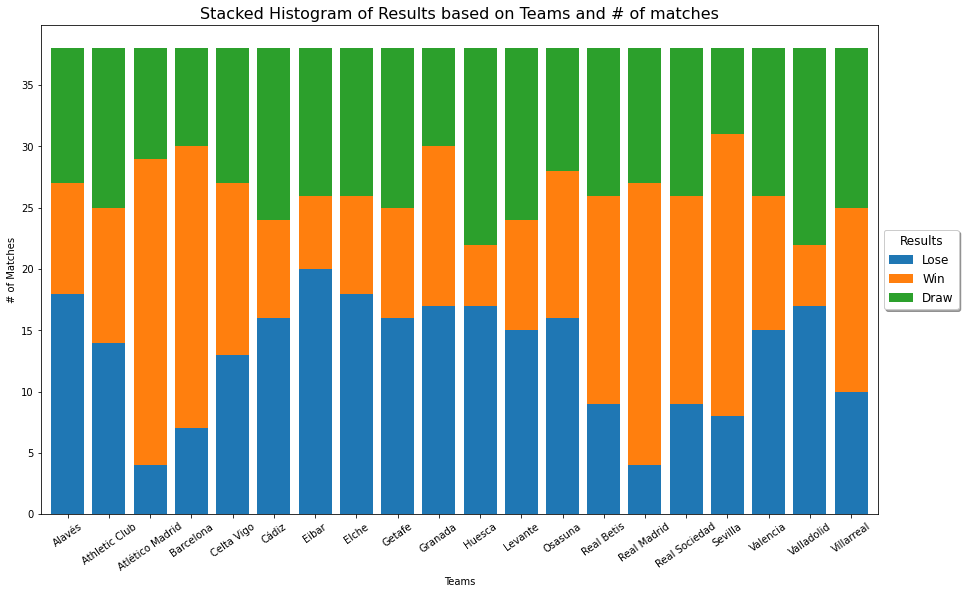

In [65]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()


Data Processing : 

In [66]:
# Convert the type of dates from Str to Date : 
from datetime import * 
dates = []
for i in df_versus['Date']:
    date_str = str(i).replace("-","/")
    date_obj = datetime.strptime(date_str, '%Y/%m/%d').date()
    dates.append(date_obj)
df_versus['Date']= pd.DataFrame(np.array(dates))

In [67]:
def average_last_3(feature):
    # do the average of the "feature" in the 3 last matches of the team 
    media = []
    for date, team in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<date]
        oi = oi.loc[oi["Team"]==team]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["last_3_avrg_"+feature] = pd.DataFrame(np.array(media))   

def average(feature):
    # do the average of the "feature" in all the matches of the team before the match going to play it
    media = []
    for i, j in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<i]
        oi = oi.loc[oi["Team"]==j]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["avrg_"+feature] = pd.DataFrame(np.array(media))


In [68]:
# for each feature, apply the average of the last 3 matches 
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Home/Away','Stadium','Crowd'])

for feature in features_average.columns:
    average_last_3(feature)
    average(feature)

df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                760 non-null    object 
 1   Date                 760 non-null    object 
 2   Team                 760 non-null    object 
 3   Stadium              760 non-null    object 
 4   Crowd                760 non-null    object 
 5   Gls                  760 non-null    int64  
 6   Ast                  760 non-null    int64  
 7   PK                   760 non-null    int64  
 8   PKatt                760 non-null    int64  
 9   Sh                   760 non-null    int64  
 10  SoT                  760 non-null    int64  
 11  CrdY                 760 non-null    int64  
 12  CrdR                 760 non-null    int64  
 13  Touches              760 non-null    float64
 14  Press                760 non-null    float64
 15  Tkl                  760 non-null    flo

In [69]:
# delete the features for the specefic match 
df_versus = df_versus.drop(columns=["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR",
    "Touches","Press","Tkl", "Int", "Blocks"])
df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                760 non-null    object 
 1   Date                 760 non-null    object 
 2   Team                 760 non-null    object 
 3   Stadium              760 non-null    object 
 4   Crowd                760 non-null    object 
 5   Results              760 non-null    int64  
 6   Home/Away            760 non-null    int64  
 7   last_3_avrg_Gls      740 non-null    float64
 8   avrg_Gls             740 non-null    float64
 9   last_3_avrg_Ast      740 non-null    float64
 10  avrg_Ast             740 non-null    float64
 11  last_3_avrg_PK       740 non-null    float64
 12  avrg_PK              740 non-null    float64
 13  last_3_avrg_PKatt    740 non-null    float64
 14  avrg_PKatt           740 non-null    float64
 15  last_3_avrg_Sh       740 non-null    flo

In [70]:
'''
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()

X = df_versus.drop(columns=['Date','Match','Team','Results','Stadium','Crowd'])
Y = df_versus['Results']

#Get rid of Naan values and infinite values to avoid the ValueError : 
#Input contains Naan, infinity or a value too large for dtype('float64')


X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
acc_random = []
acc_KNN = []
acc_logistic = []
acc_svm = []
for i in range(1000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("Random Forest : ", np.array(acc_random).mean())
print("KNN : ",np.array(acc_KNN).mean())
print("Logistic Regression : ",np.array(acc_logistic).mean())
print("SVM : ", np.array(acc_svm).mean())

'''


'\nimport warnings\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn import svm\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import precision_score\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import recall_score\nfrom sklearn.metrics import f1_score\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn import svm\nfrom sklearn.neighbors import KNeighborsClassifier\n\nclf_random = RandomForestClassifier()\nclf_logistic = LogisticRegression()\nclf_svm = svm.SVC()\nclf_KNN = KNeighborsClassifier()\n\nX = df_versus.drop(columns=[\'Date\',\'Match\',\'Team\',\'Results\',\'Stadium\',\'Crowd\'])\nY = df_versus[\'Results\']\n\n#Get rid of Naan values and infinite values to avoid the ValueError : \n#Input contains Naan, infinity or a value too large for dtype(\'float64\')\n\n\nX = X.replace((np.inf, -np.inf, np.nan

In [71]:
'''
# to correct

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Home/Away','Stadium','Crowd'])

differences = {}
for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    difference = []
    for avg_feature in features_average.columns:
        difference.append(oi[avg_feature][0]-oi[avg_feature][1])
    differences[avg_feature]= difference

for avg_feature, difference in differences.items():
    difference = pd.DataFrame(difference)
    df_versus[avg_feature] = difference

df_versus
'''

'\n# to correct\n\nmatches = pd.DataFrame(df_versus.Match.drop_duplicates())\nmatches = matches.reset_index(drop=True)\nfeatures_average = df_versus.drop(columns=[\'Match\',\'Date\',\'Results\',\'Team\',\'Home/Away\',\'Stadium\',\'Crowd\'])\n\ndifferences = {}\nfor i in matches.Match:\n    i = str(i)\n    oi = df_versus.loc[df_versus["Match"]==i]\n    oi = oi.reset_index(drop=True)\n    difference = []\n    for avg_feature in features_average.columns:\n        difference.append(oi[avg_feature][0]-oi[avg_feature][1])\n    differences[avg_feature]= difference\n\nfor avg_feature, difference in differences.items():\n    difference = pd.DataFrame(difference)\n    df_versus[avg_feature] = difference\n\ndf_versus\n'

In [72]:
opponent_teams = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    b = a[1].replace("_"," ")
    a = a[0].replace("_"," ")
    if a == j:
        opponent_teams.append(b[1:]) 
    else : 
        opponent_teams.append(a)
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_teams))
df_versus.head(5)

,Match,Date,Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,...,avrg_Touches,last_3_avrg_Press,avrg_Press,last_3_avrg_Tkl,avrg_Tkl,last_3_avrg_Int,avrg_Int,last_3_avrg_Blocks,avrg_Blocks,Opponent_Team
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,1,0.666667,0.500000,0.333333,...,478.250000,144.333333,156.000000,17.000000,19.250000,7.666667,6.000000,14.666667,15.250000,Athletic Club
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0.666667,0.666667,0.666667,...,600.666667,125.333333,125.333333,12.000000,12.000000,4.333333,4.333333,12.000000,12.000000,Alavés
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1.666667,0.875000,1.000000,...,474.562500,182.666667,145.375000,16.000000,16.375000,8.000000,8.562500,19.666667,16.125000,Atlético Madrid
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,0.666667,1.857143,0.666667,...,677.357143,127.333333,130.214286,19.000000,17.357143,9.333333,9.357143,17.666667,16.142857,Alavés
4,Alavés_vs_Barcelona,2020-10-31,Alavés,"<span style=""display:inline-block"">Alejandro H...","Estadio de Mendizorroza, Vitoria-Gasteiz",2,1,1.333333,0.714286,1.000000,...,504.000000,170.333333,158.285714,16.666667,16.857143,8.333333,7.000000,17.333333,16.571429,Barcelona


In [73]:
# index teams 
set_of_teams = set(df_versus["Team"])
team_index = {}
i=1
for team in set_of_teams : 
    team_index[team]=i
    i+=1
team_index

{'Alavés': 1,
 'Real Betis': 2,
 'Sevilla': 3,
 'Atlético Madrid': 4,
 'Levante': 5,
 'Valladolid': 6,
 'Cádiz': 7,
 'Real Madrid': 8,
 'Eibar': 9,
 'Huesca': 10,
 'Getafe': 11,
 'Celta Vigo': 12,
 'Real Sociedad': 13,
 'Villarreal': 14,
 'Elche': 15,
 'Valencia': 16,
 'Athletic Club': 17,
 'Osasuna': 18,
 'Granada': 19,
 'Barcelona': 20}

In [74]:
# update the database considering the indexes of teams : 
teams = df_versus["Team"]
opponent_teams = df_versus["Opponent_Team"]
team_indexes = []
opponent_team_indexes = []
for team in teams : 
    team_indexes.append(team_index[team])
for team in opponent_teams : 
    opponent_team_indexes.append(team_index[team])
df_versus["Team"] = pd.DataFrame(np.array(team_indexes))
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_team_indexes))

df_versus.head(5)

,Match,Date,Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,...,avrg_Touches,last_3_avrg_Press,avrg_Press,last_3_avrg_Tkl,avrg_Tkl,last_3_avrg_Int,avrg_Int,last_3_avrg_Blocks,avrg_Blocks,Opponent_Team
0,Alavés_vs_Athletic_Club,2020-10-04,1,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,1,0.666667,0.500000,0.333333,...,478.250000,144.333333,156.000000,17.000000,19.250000,7.666667,6.000000,14.666667,15.250000,17
1,Alavés_vs_Athletic_Club,2020-10-04,17,"<span style=""display:inline-block"">José Sánche...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0.666667,0.666667,0.666667,...,600.666667,125.333333,125.333333,12.000000,12.000000,4.333333,4.333333,12.000000,12.000000,1
2,Alavés_vs_Atlético_Madrid,2021-01-03,1,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1.666667,0.875000,1.000000,...,474.562500,182.666667,145.375000,16.000000,16.375000,8.000000,8.562500,19.666667,16.125000,4
3,Alavés_vs_Atlético_Madrid,2021-01-03,4,"<span style=""display:inline-block"">Juan Martín...","Estadio de Mendizorroza, Vitoria-Gasteiz",1,0,0.666667,1.857143,0.666667,...,677.357143,127.333333,130.214286,19.000000,17.357143,9.333333,9.357143,17.666667,16.142857,1
4,Alavés_vs_Barcelona,2020-10-31,1,"<span style=""display:inline-block"">Alejandro H...","Estadio de Mendizorroza, Vitoria-Gasteiz",2,1,1.333333,0.714286,1.000000,...,504.000000,170.333333,158.285714,16.666667,16.857143,8.333333,7.000000,17.333333,16.571429,20


In [75]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()

X = df_versus.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_versus['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
acc_random = []
acc_KNN = []
acc_logistic = []
acc_svm = []
for i in range(1000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("Random Forest : ", np.array(acc_random).mean())
print("KNN : ",np.array(acc_KNN).mean())
print("Logistic Regression : ",np.array(acc_logistic).mean())
print("SVM : ", np.array(acc_svm).mean())




Random Forest :  0.4206842105263158
KNN :  0.42314473684210524
Logistic Regression :  0.41628947368421054
SVM :  0.4416973684210526
